# Plotting time-series
**Time series data is data that is recorded. Visualizing this type of data helps clarify trends and illuminates relationships between data.**

In [1]:
import pandas as pd
import numpy as np

## Read data with a time index
Pandas DataFrame objects can have an index that denotes time. This is useful because Matplotlib recognizes that these measurements represent time and labels the values on the axis accordingly.

In this exercise, you will read data from a CSV file called `climate_change.csv` that contains measurements of CO2 levels and temperatures made on the 6th of every month from 1958 until 2016. You will use Pandas' `read_csv` function.

To designate the index as a DateTimeIndex, you will use the `parse_dates` and `index_col` key-word arguments both to parse this column as a variable that contains dates and also to designate it as the index for this DataFrame.

- Read in the data from a CSV file called `'climate_change.csv'` using `pd.read_csv`.
- Use the `parse_dates` key-word argument to parse the `"date"` column as dates.
- Use the `index_col` key-word argument to set the `"date"` column as the index.

In [2]:
# Read the data from file using read_csv
climate_change = pd.read_csv('climate_change.csv'
                             , parse_dates=['date'], index_col='date')

climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


## Plot time-series data
To plot time-series data, we use the Axes object `plot` command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

In this case, the index of the DataFrame would be used as the x-axis values and we will plot the values stored in the `"relative_temp"` column as the y-axis values. We will also properly label the x-axis and y-axis.

- Add the data from `climate_change` to the plot: use the DataFrame `index` for the x value and the `"relative_temp"` column for the y values.
- Set the x-axis label to `'Time'`.
- Set the y-axis label to `'Relative temperature (Celsius)'`.
- Show the figure.

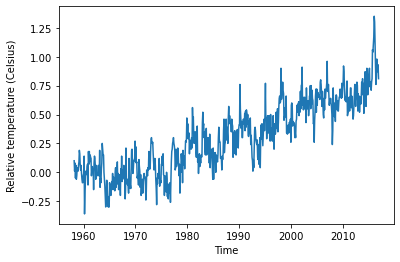

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

## Using a time index to zoom in
When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a to zoom in on a particular period within the time-series using Pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.

- Create a variable called `seventies` that includes all the data between `"1970-01-01"` and `"1979-12-31"`.
- Add the data from `seventies` to the plot: use the DataFrame `index` for the x value and the `"co2"` column for the y values.

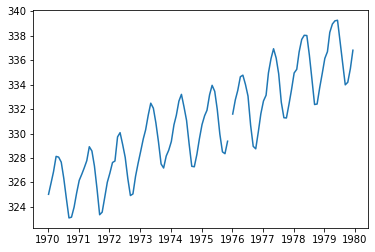

In [4]:
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

- Create a variable called `two_thousands` that includes all the data from `"2000-01-01"`.
- Add the data from `two_thousands` to the plot: use the DataFrame `index` for the x value and the `"co2"` column for the y values.

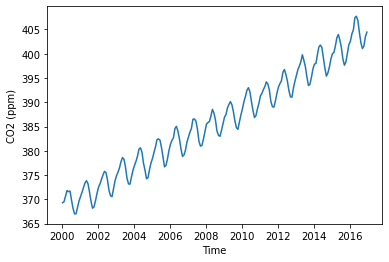

In [5]:
fig, ax = plt.subplots()

two_thousands = climate_change["2000-01-01":]

ax.plot(two_thousands.index, two_thousands["co2"])

ax.set_xlabel('Time')

ax.set_ylabel('CO2 (ppm)')

plt.show()

## Plotting two variables
If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the `twinx` method.


- Use `plt.subplots` to create a Figure and Axes objects called `fig` and `ax`, respectively.
- Plot the carbon dioxide variable in blue using the Axes `plot` method.
- Use the Axes `twinx` method to create a twin Axes that shares the x-axis.
- Plot the relative temperature variable in the twin Axes using its `plot` method.

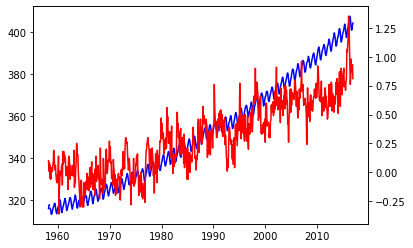

In [6]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

---

## Plotting time-series with different variables

### Plotting two time-series together
```python
import pandas as pd
climate_change = pd.read_csv('climate_change.csv'
                             , parse_dates=["date"]
                             , index_col="date")
```


### Plotting two time-series together

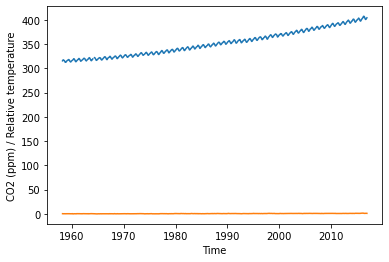

In [7]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change["co2"])

ax.plot(climate_change.index, climate_change["relative_temp"])

ax.set_xlabel('Time')

ax.set_ylabel('CO2 (ppm) / Relative temperature')

plt.show()

*This doesn't look right. The line for carbon dioxide has shifted upwards, and the line for relative temperatures looks completely flat. The problem is that the scales for these two measurements are different.*

### Using twin axes

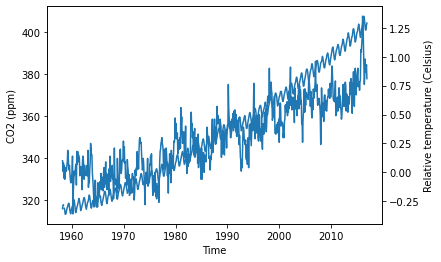

In [8]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change["co2"])

ax.set_xlabel('Time')

ax.set_ylabel('CO2 (ppm)')

ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change["relative_temp"])

ax2.set_ylabel('Relative temperature (Celsius)')

plt.show()

*Now we can see the fluctuations in temperature more clearly. But this is still not quite right. The two lines have the same color.*

### Separating variables by color

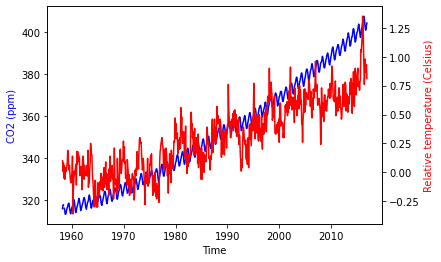

In [9]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change["co2"], color='blue')

ax.set_xlabel('Time')

ax.set_ylabel('CO2 (ppm)', color='blue')

ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

ax2.set_ylabel('Relative temperature (Celsius)', color='red')

plt.show()

### Coloring the ticks

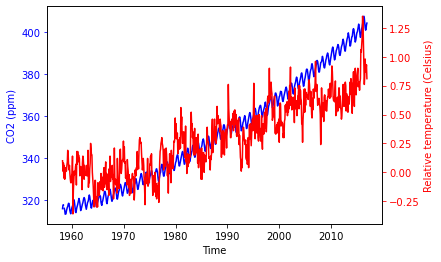

In [10]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change["co2"], color='blue')

ax.set_xlabel('Time')

ax.set_ylabel('CO2 (ppm)', color='blue')

ax.tick_params('y', colors='blue')

ax2 = ax.twinx()

ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

ax2.set_ylabel('Relative temperature (Celsius)', color='red')

ax2.tick_params('y', colors='red')

plt.show()

## Defining a function that plots time-series data
Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.

- Define a function called `plot_timeseries` that takes as input an Axes object (`axes`), data (`x`,`y`), a string with the name of a color and strings for x- and y-axis labels.
- Plot y as a function of in the color provided as the input `color`.
- Set the x- and y-axis labels using the provided input `xlabel` and `ylabel`, setting the y-axis label color using `color`.
- Set the y-axis tick parameters using the `tick_params` method of the Axes object, setting the `colors` key-word to `color`.

In [11]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    
    # Plot the inputs x,y in the provided color
    axes.plot(x, y, color=color)
    
    # Set the x-axis label
    axes.set_xlabel(xlabel)
    
    # Set the y-axis label
    axes.set_ylabel(ylabel, color=color)
    
    # Set the colors tick params for y-axis
    axes.tick_params('y', colors=color)

## Using a plotting function
Defining functions allows us to reuse the same code without having to repeat all of it. 

In the previous exercise, you defined a function called `plot_timeseries`:

`plot_timeseries(axes, x, y, color, xlabel, ylabel)`

that takes an Axes object (as the argument `axes`), time-series data (as `x` and `y` arguments) the name of a color (as a string, provided as the `color` argument) and x-axis and y-axis labels (as `xlabel` and `ylabel` arguments). Use this function to plot the `climate_change` time-series data.

- In the provided `ax` object, use the function `plot_timeseries` to plot the `"co2"` column in blue, with the x-axis label `"Time (years)"` and y-axis label `"CO2 levels"`.
- Use the `ax.twinx` method to add an Axes object to the figure that shares the x-axis with `ax`.
- Use the function `plot_timeseries` to add the data in the `"relative_temp"` column in red to the twin Axes object, with the x-axis label `"Time (years)"` and y-axis label `"Relative temperature (Celsius)"`.

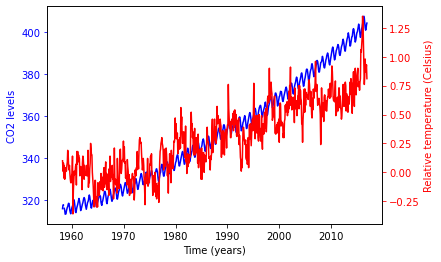

In [12]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2']
                , 'blue', 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp']
                , 'red', 'Time (years)', 'Relative temperature (Celsius)')

plt.show()

## Annotating a plot of time-series data
Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

For this, we will use the annotate method of the `Axes` object. 
Using the Axes methods, plot only the relative temperature column as a function of dates, and annotate the data.

- Use the `ax.plot` method to plot the DataFrame index against the `relative_temp` column.
- Use the `annotate` method to add the text `'>1 degree'` in the location `(pd.Timestamp('2015-10-06'), 1)`.

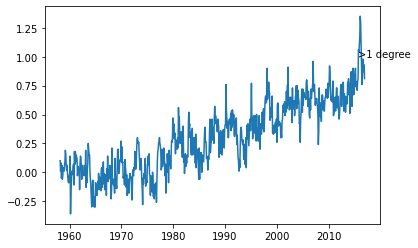

In [13]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', (pd.Timestamp('2015-10-6'), 1))

plt.show()

## Plotting time-series: putting it all together
In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

You should also use the function that we have defined before, called `plot_timeseries`, which takes an Axes object (as the `axes` argument) plots a time-series (provided as `x` and `y` arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:

`plot_timeseries(axes, x, y, color, xlabel, ylabel)`

Then, you will annotate with text an important time-point in the data: on 2015-10-06, when the temperature first rose to above 1 degree over the average.

- Use the `plot_timeseries` function to plot CO2 levels against time. Set xlabel to `"Time (years)"` ylabel to `"CO2 levels" `and color to `'blue'`.
- Create `ax2`, as a twin of the first Axes.
- In `ax2`, plot temperature against time, setting the color ylabel to `"Relative temp (Celsius)"` and color to `'red'`.
- Annotate the data using the `ax2.annotate` method. Place the text `">1 degree"` in x=`pd.Timestamp('2008-10-06')`, y=`-0.2` pointing with a gray thin arrow to x=`pd.Timestamp('2015-10-06')`, y = `1`.

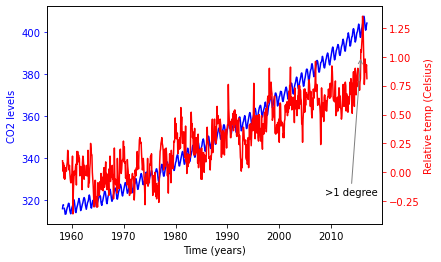

In [16]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2']
                , 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp']
                , 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1)
             , xytext=(pd.Timestamp('2008-10-06'), -0.2)
             , arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()